In [18]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

In [19]:
iris = datasets.load_iris()
print("features names: ", iris.feature_names)
print("iris types names: ", iris.target_names)


features names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
iris types names:  ['setosa' 'versicolor' 'virginica']


In [20]:
# storing features and labels
iris_X = iris.data
iris_y = iris.target


In [21]:
# printing number of samples
print("shape of data: ", iris_X.shape)

shape of data:  (150, 4)


In [22]:
# spitting train set and test set
X_train, X_test, y_train, y_test = train_test_split(
    iris_X, iris_y, test_size=0.2, random_state=7)

In [23]:
# finding optimum k for our algorithm
k_range = range(1, 20)
scores = dict()
scores_list = list()

In [24]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Accuracy')

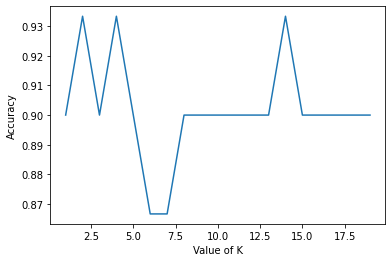

In [25]:
# plotting the result
plt.plot(k_range, scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")


In [27]:
# getting optimum k
knn = KNeighborsClassifier(n_neighbors=np.argmax(scores_list))

# fitting the whole dataset
knn.fit(iris_X, iris_y)

# names of iris types
types = {i: iris.target_names[i] for i in range(len(iris.target_names))}

# creating sample validation set
X_val = [[7, 5, 7, 5], [4, 4, 3, 3]]
y_val = knn .predict(X_val)

for i in range(len(X_val)):
    print(types[y_val[i]])

plt.show()


virginica
versicolor
